# Multiple Linear Regression

# Introduction

Tthe problem is to estimate the relative CPU performance of computer hardware dataset. Relative CPU performance of the computer hardware is described in terms of machine cycle time, main memory, cache memory and minimum and maximum channels as given in the dataset.
    
**Data Description**  
- Vendor name: 30 (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, dg, formation, four-phase, gould, honeywell, hp, ibm, ipl,        magnuson, microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, sratus, wang)

- MYCT: machine cycle time in nanoseconds (integer)

- MMIN: minimum main memory in kilobytes (integer)

- MMAX: maximum main memory in kilobytes (integer)

- CACH: cache memory in kilobytes (integer)

- CHMIN: minimum channels in units (integer)

- CHMAX: maximum channels in units (integer)

- PRP: published relative performance (integer)

- ERP: estimated relative performance from the original article (integer) : **Target Variable-Y**


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
computer_hardware = fetch_ucirepo(id=29) 
  
# data (as pandas dataframes) 
X = computer_hardware.data.features 
y = computer_hardware.data.targets 
  
# metadata 
print(computer_hardware.metadata) 
  
# variable information 
print(computer_hardware.variables) 


{'uci_id': 29, 'name': 'Computer Hardware', 'repository_url': 'https://archive.ics.uci.edu/dataset/29/computer+hardware', 'data_url': 'https://archive.ics.uci.edu/static/public/29/data.csv', 'abstract': 'Relative CPU Performance Data, described in terms of its cycle time, memory size, etc.', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 209, 'num_features': 10, 'feature_types': ['Integer'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Fri Oct 27 2023', 'dataset_doi': '10.24432/C5830D', 'creators': ['Jacob Feldmesser'], 'intro_paper': None, 'additional_info': {'summary': 'The estimated relative performance values were estimated by the authors using a linear regression method.  See their article (pp 308-313) for more details on how the relative performance values were set.', 'purpose': None, 'funded_by': N

In [3]:
filename = "C:/Users/trive/Desktop/vaanishka/Data Science/computer+hardware/machine.data"

df = pd.read_csv(filename, header = None)

In [4]:
col_names=['Vendor Name','Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH','CHMIN', 'CHMAX', 'PRP', 'ERP']
df.columns=col_names

In [5]:
df.head()

,Vendor Name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [6]:
df.info()                
# categorical varibale: type object
# numerical variable: type int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Vendor Name  209 non-null    object
 1   Model Name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMIN         209 non-null    int64 
 4   MMAX         209 non-null    int64 
 5   CACH         209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 
 9   ERP          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [7]:
categorical=[col for col in df.columns if df[col].dtype=='O']
print(f"There are {len(categorical)} categorical columns")

There are 2 categorical columns


In [8]:
print(categorical)

['Vendor Name', 'Model Name']


In [9]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 8 numerical variables


In [10]:
print(numerical)

['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']


# Correlation

In [11]:
df.drop(columns=['Vendor Name', 'Model Name'],inplace = True)

In [12]:
# estimate correlation coefficients
pd.options.display.float_format='{:,.4f}'.format
corr_matrix=df.corr()
corr_matrix

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
MYCT,1.0000,-0.3356,-0.3786,-0.3210,-0.3011,-0.2505,-0.3071,-0.2884
MMIN,-0.3356,1.0000,0.7582,0.5347,0.5172,0.2669,0.7949,0.8193
MMAX,-0.3786,0.7582,1.0000,0.5380,0.5605,0.5272,0.8630,0.9012
CACH,-0.3210,0.5347,0.5380,1.0000,0.5822,0.4878,0.6626,0.6486
CHMIN,-0.3011,0.5172,0.5605,0.5822,1.0000,0.5483,0.6089,0.6106
CHMAX,-0.2505,0.2669,0.5272,0.4878,0.5483,1.0000,0.6052,0.5922
PRP,-0.3071,0.7949,0.8630,0.6626,0.6089,0.6052,1.0000,0.9665
ERP,-0.2884,0.8193,0.9012,0.6486,0.6106,0.5922,0.9665,1.0000


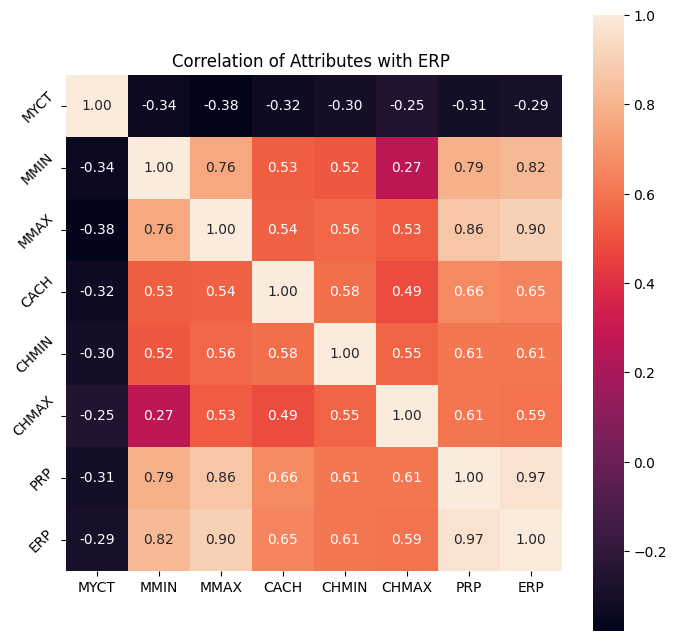

In [13]:
plt.figure(figsize=(8,8))
plt.title("Correlation of Attributes with ERP ")
a=sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels())
a.set_yticklabels(a.get_yticklabels(), rotation=45)
plt.show()

- We can see that **ERP** is positively correlated with **MMIN, MMAX, CACH, CHMIN and CHMAX**.

- Also, there is a strong positive correlation between **ERP and MMIN** and also between **ERP and MMAX**

In [14]:
corr_matrix['ERP'].sort_values(ascending=False)

ERP      1.0000
PRP      0.9665
MMAX     0.9012
MMIN     0.8193
CACH     0.6486
CHMIN    0.6106
CHMAX    0.5922
MYCT    -0.2884
Name: ERP, dtype: float64

# Linear Regression Model

**Selecting  Target and Predictor Variable**

In [15]:
x = df.iloc[:,0:6]

y = df.iloc[:,-1]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

# Feature Scaling

In [17]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [18]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Predicting The Results

In [19]:
y_pred=model.predict(x_test)

**Predicting estimated relative CPU performance values**

In [20]:
model.predict(x_test)[0:5]

array([ 48.67087666, -21.29189893,  94.52935272, 355.67446787,
        82.13788805])

**Model slope and intercept terms**

The **slope** parameters(w) are also called **weights or coefficients**. They are stored in the **coef_** attribute.

The offset or **intercept(b)** is stored in the **intercept_** attribute.

So, the model slope is given by lr.coef_ and model intercept term is given by lr.intercept_.

In [21]:
print("Number of coefficients:", len(model.coef_))

print(f"Estimated coefficients: {model.coef_}")

print(f"Estimated intercept: {model.intercept_}")

Number of coefficients: 6
Estimated coefficients: [17.70202595 59.11241774 78.35042681 16.53981449 -0.35410978 38.97256261]
Estimated intercept: 100.0


In [22]:
dataset = list(zip(pd.DataFrame(x_train).columns, model.coef_))

pd.DataFrame(data = dataset, columns = ['Features', 'Estimated Coefficients']).set_index('Features')

,Estimated Coefficients
Features,
0,17.7020
1,59.1124
2,78.3504
3,16.5398
4,-0.3541
5,38.9726


# Model Performance

# RMSE

- RMSE is an absolute measure of fit. 
- It gives us how spread the residuals are, given by the standard deviation of the residuals. 
- The more concentrated the data is around the regression line, the lower the residuals and hence lower the standard deviation of residuals. 
- It results in lower values of RMSE. So, lower values of RMSE indicate better fit of data.

In [23]:
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(f"The RMSE value is {rmse}")

The RMSE value is 48.64995193572238


# R2 SCORE 

**= Explained Variation/Total Variation**

- The higher the R2 Score value, the better the model fits the data. Usually, its value ranges from 0 to 1. 
- So, we want its value to be as close to 1. Its value can become negative if our model is wrong.
- In business decisions, the benchmark for the R2 score value is 0.7. 
- It means if R2 score value >= 0.7, then the model is good enough to deploy on unseen data whereas if R2 score value < 0.7, 
  then the model is not good enough to deploy.



In [24]:
print(F"R2 Score value: {r2_score(y_test, y_pred)}")

R2 Score value: 0.8700195548230454


**Interpretation**  
  
 Our R2 score value has been found to be 0.87. It means that this model explains 87% of the variance in our dependent variable. 
  So, the R2 score value confirms that the model is good enough to deploy because it provides good fit to the data.

# UNDERFITTING VS OVERFITTING

**UNDERFITTING** 
- Occurs when a model performs **poorly on both** the training and test sets
- Indicating it hasn't learned the underlying patterns well enough.  
- A **LARGE GAP** between training and test set performance scores signifies overfitting  

**OVERFITTING**  
- Happens when a model performs **very well** on the **training data** but 
- **Poorly** on the **test set**, 
- Signifying it has memorized the training data too closely and cannot generalize to new data
- **SIMILAR** low performance on both sets indicates underfitting

In [41]:
# Evaluating Training set performance
model.score(x_train, y_train)

0.9063759059069312

In [38]:
# Evaluating Test set data
model.score(x_test, y_test)

0.8700195548230454

**Interpretation**  
training set and test set scores are comparable

# CROSS VALIDATION

- Coss-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model.
- In cross-validation, we split the training data into several subgroups. Then we use each of them in turn to evaluate the model fitted on the remaining portion of the data.
- It helps us to obtain reliable estimates of the model's generalization performance. So, it helps us to understand how well the model performs on unseen data.

In [30]:
from sklearn.model_selection import cross_val_score

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(model, x, y, cv=5)

In [31]:
print(cv_scores.round(4))

[ 0.8484 -0.864   0.7149  0.8755  0.7707]


In [32]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores).round(4)))

Average 5-Fold CV Score: 0.4691


**Interpretation**  
  
There is a large fluctuation in the cross validation scores of the model.
The average 5-fold cross validation score is very poor and hence the linear regression model is not a great fit to the data.

# Residual analysis


- A linear regression model may not represent the data appropriately. The model may be a poor fit to the data. 
- So, we should validate our model by defining and examining residual plots. The difference between the observed value of the dependent variable (y) and the predicted value (ŷi) is called the residual and is denoted by e. 
- The scatter-plot of these residuals is called residual plot.

- If the data points in a residual plot are randomly dispersed around horizontal axis and an approximate zero residual mean, a linear regression model may be appropriate for the data. Otherwise a non-linear model may be more appropriate.

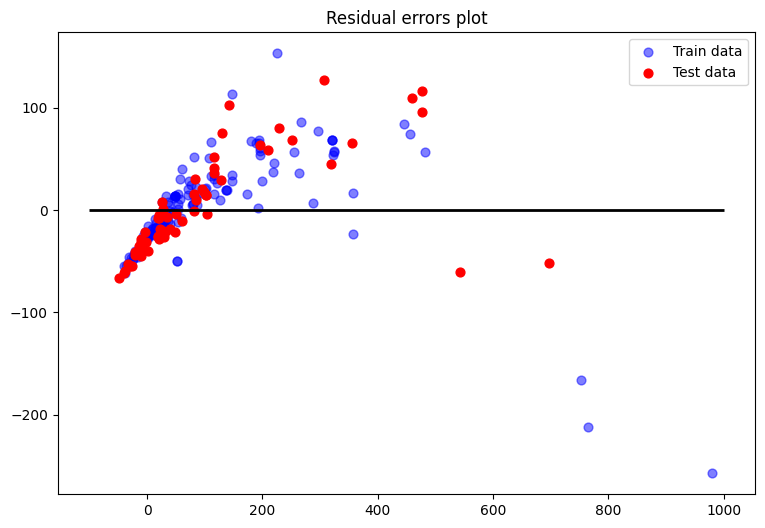

In [61]:
plt.figure(figsize=(9,6))
plt.scatter(model.predict(x_train), model.predict(x_train) - y_train, c = 'b', s = 40, label = 'Train data', alpha = 0.5)
plt.scatter(model.predict(x_test), model.predict(x_test) - y_test, c = 'r', s = 40, label = 'Test data')
plt.hlines(y = 0, xmin = -100, xmax = 1000, linewidth = 2, color='black')
plt.legend(loc = 'upper right')
plt.title("Residual errors plot")
plt.show()

**Interpretation** 
  
A regression model that has nicely fit the data will have its residuals display randomness (i.e., lack of any pattern). 
This comes from the **homoscedasticity** assumption of regression modeling. 
Typically scatter plots between residuals and predictors are used to confirm the assumption. 
Any **pattern** in the scatter-plot, results in a violation of this property and points towards a **poor fitting model.**

# NORMALITY TEST(Q-Q Plot)

- This is a visual or graphical test to check for normality of the data. This test helps us identify outliers and skewness. The test is performed by plotting the data verses theoretical quartiles. The same data is also plotted on a histogram to confirm normality.

- Any deviation from the straight line in normal plot or skewness/multi-modality in histogram shows that the data does not pass the normality test.

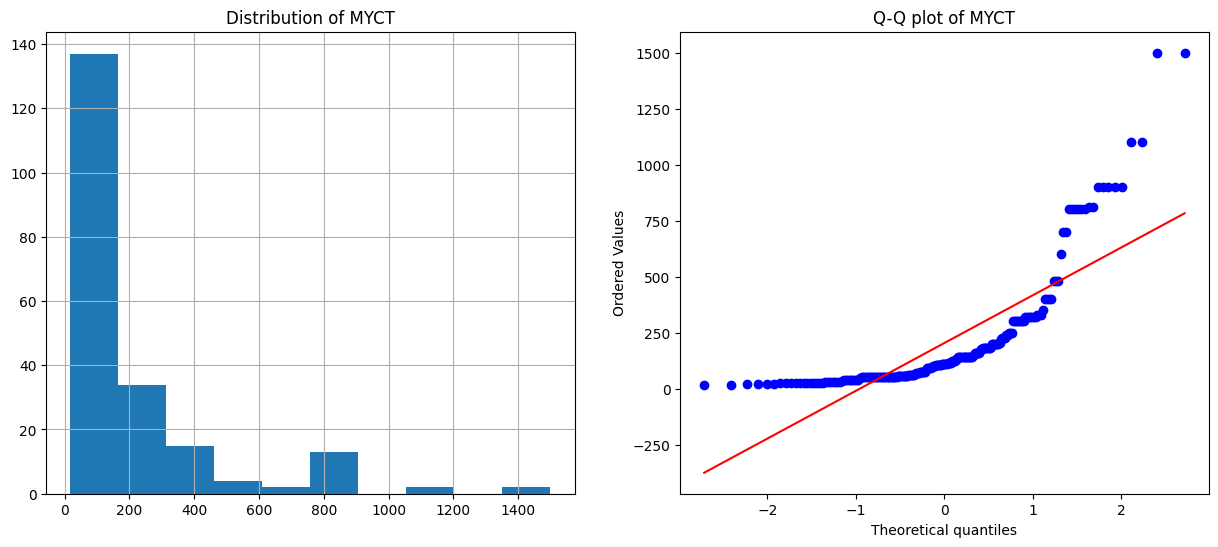

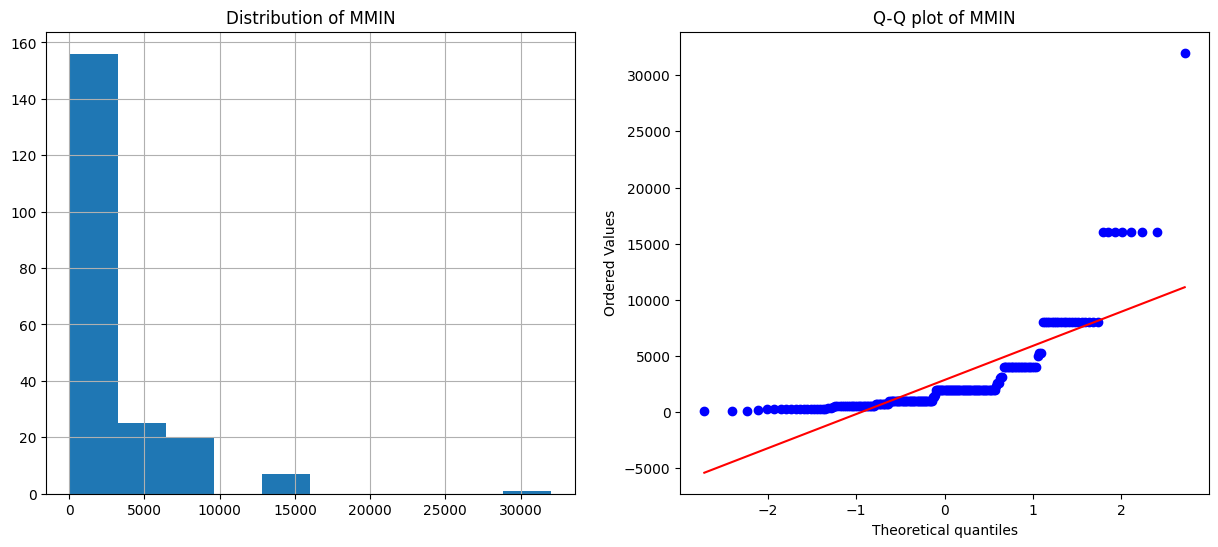

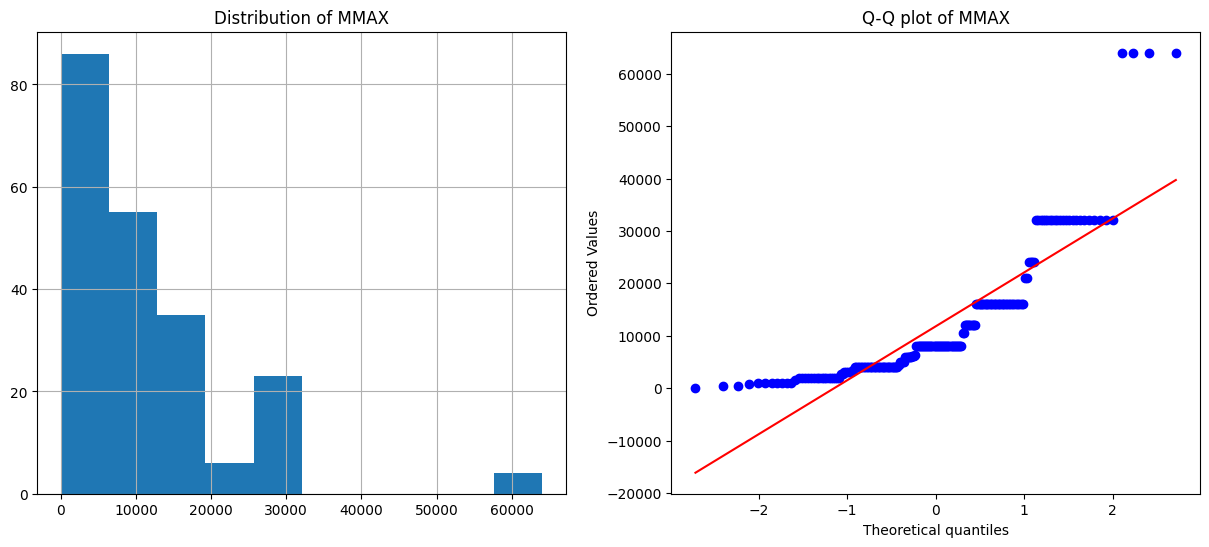

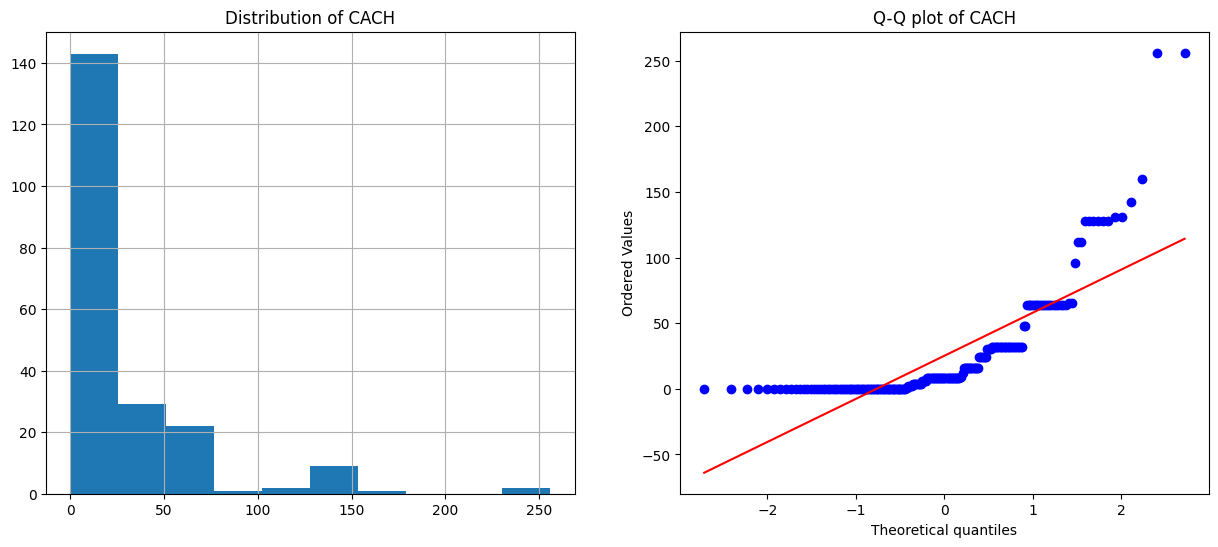

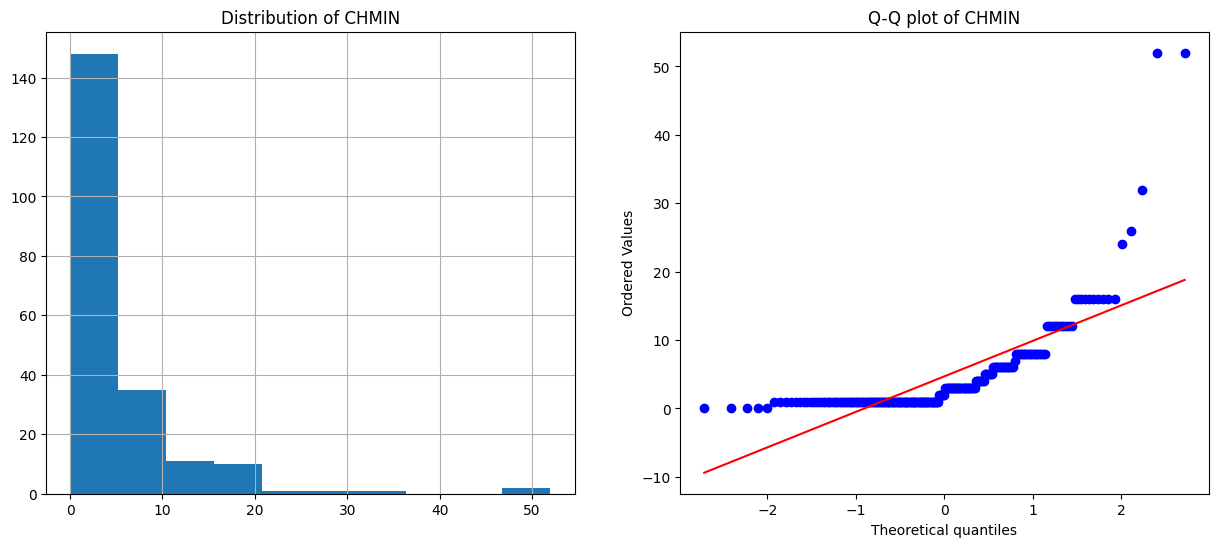

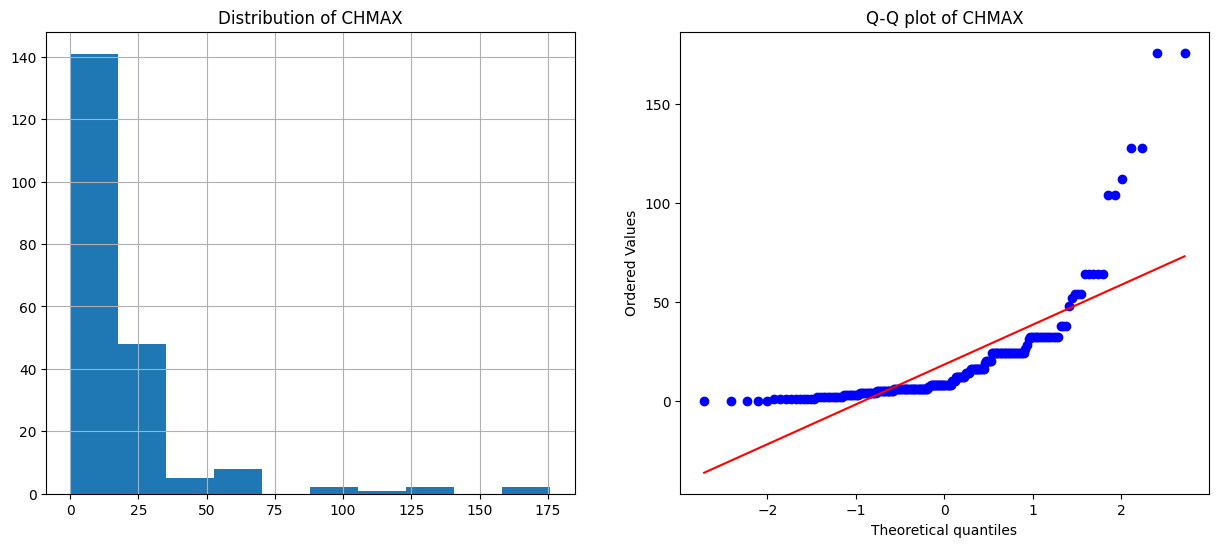

In [62]:
import pylab 
import scipy.stats as stats


for var in ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']:
    
    plt.figure(figsize=(15,6))

    plt.subplot(1, 2, 1)
    df[var].hist()
    plt.title('Distribution of '+ var)

    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=pylab)
    plt.title('Q-Q plot of '+ var)

    plt.show() 


# Conclusion


  
Normality test is not passed in residual analysis, it suggests that the residuals are not normally distributed. This could indicate that the model is inadequate, meaning there may be patterns or signals in the data that the model has not captured, or it could be due to outliers or non-linear relationships.